In [2]:
# Importamos librerías necesarias
import pandas as pd           # Para manejo de datos en tablas (DataFrames)
import statistics as st       # Funciones estadísticas básicas
import numpy as np            # Operaciones numéricas avanzadas
import matplotlib.pyplot as plt  # Visualización de gráficos
import os                     # Interacción con el sistema de archivos

# Cargar el dataset de consumo de energía
print("--- 1. Recolección de Datos del consumo de energía en diferentes tipos de viviendas ---")
consumo = pd.read_csv("consumo_viviendas.csv")
print(consumo)

--- 1. Recolección de Datos del consumo de energía en diferentes tipos de viviendas ---
       id tipo_vivienda       zona  area_m2  ocupantes  consumo_kwh_mes
0       1  Departamento  Suburbana       64          3            228.2
1       2  Departamento     Urbana       68          1             81.9
2       3          Casa  Suburbana      109          3            235.7
3       4          Casa     Urbana       98          2            267.1
4       5  Departamento  Suburbana       51          2            181.5
..    ...           ...        ...      ...        ...              ...
995   996          Casa      Rural      120          4            439.3
996   997  Departamento     Urbana       56          1             95.6
997   998          Casa     Urbana      134          5            459.2
998   999          Casa  Suburbana      105          4            309.9
999  1000  Departamento     Urbana       60          3            234.1

[1000 rows x 6 columns]


In [3]:
# Cálculo de Medidas de Tendencia Central: Media, Mediana, Moda
# Tomamos la lista consumo_kwh_mes y eliminamos valores nulos
datos = consumo["consumo_kwh_mes"].dropna()

print("\n--- 2. Medidas de Tendencia Central: ---")
# Càlculo Media
media = sum(datos) / len(datos)
print("\nMedia:  ", media)

# Càlculo Mediana
mediana = st.median(datos)
print("Mediana:", mediana)


# Moda usando statistics
moda = st.mode(datos)
print("Moda:   ", moda)




--- 2. Medidas de Tendencia Central: ---

Media:   277.8472
Mediana: 249.10000000000002
Moda:    181.5


In [4]:
print("\n--- 3. Medidas de Dispersión ---")

# Cargar el dataset y seleccionar la columna de consumo
df_consumo = pd.read_csv("consumo_viviendas.csv").dropna(subset=['consumo_kwh_mes'])
datos_consumo = np.array(df_consumo['consumo_kwh_mes'])

#Calcular la Varianza
#Formula: Suma de (x - media)² / N
varianza_consumo = datos_consumo.var()
print("\nVarianza:", varianza_consumo)

#Calcular la Desviación Estándar
#Formula: Raíz cuadrada de la Varianza
desviacion_estandar_consumo = datos_consumo.std()
print("Desviación Estándar:", desviacion_estandar_consumo)

#Calcular el Rango
#El Rango es el valor Máximo menos el valor Mínimo
rango_consumo = datos_consumo.max() - datos_consumo.min()
print("Rango:", rango_consumo)

#Resultados:
print("\nInterpretación:")
print("La varianza y la desviación estándar muestran qué tan dispersos están los consumos respecto al promedio.")
print("La desviación estándar de 144.63 kWh/mes indica que, en promedio, los consumos se alejan de la media en esa cantidad, mostrando variabilidad entre viviendas.")
print("El rango de 687.0 kWh/mes refleja la diferencia entre el consumo más bajo y el más alto registrado, indicando el alcance total de consumo observado.")


--- 3. Medidas de Dispersión ---

Varianza: 20918.343752160003
Desviación Estándar: 144.63175222668085
Rango: 687.0

Interpretación:
La varianza y la desviación estándar muestran qué tan dispersos están los consumos respecto al promedio.
La desviación estándar de 144.63 kWh/mes indica que, en promedio, los consumos se alejan de la media en esa cantidad, mostrando variabilidad entre viviendas.
El rango de 687.0 kWh/mes refleja la diferencia entre el consumo más bajo y el más alto registrado, indicando el alcance total de consumo observado.


In [5]:
# 4.1 Histograma con Plotnine (ggplot)

# Nueva importación: Solo necesitamos importar las clases necesarias de plotnine
from plotnine import ( ggplot, aes, geom_histogram, labs, theme_minimal)

# Definimos los datos de consumo
datos_consumo_pd = df_consumo["consumo_kwh_mes"]

print("\n--- 4.1 Histograma de Consumo (ggplot) ---")

# Creamos el gráfico usando la estructura de capas de ggplot
histograma_ggplot = (
    # 1. Base: Define el DataFrame y la columna del eje X
        ggplot(df_consumo, aes(x='consumo_kwh_mes'))

        # 2. Geometría: Define el tipo de gráfico (Histograma) y su apariencia
        + geom_histogram(bins=25, fill='teal', color='black')

        # 3. Etiquetas (Labs): Título, Ejes X e Y
        + labs(
    title="Histograma de Frecuencia del Consumo de Energía",
    x="Consumo (kWh/mes)",
    y="Frecuencia de Viviendas"
)

        # 4. Tema: Estilo visual
        + theme_minimal()
)

# Guardar gráfico (usando el método .save() de plotnine)
histograma_ggplot.save('plots/histograma_frecuencia_consumo_ggplot.png')

# Imprimir / muestra el gráfico
print(histograma_ggplot)

# Interpretación
print("\nInterpretación del Histograma:")
print(
    "El Histograma muestra que la mayoría de las viviendas tienen un consumo bajo a moderado (pico a la izquierda). Esto confirma la asimetría de los datos vista en la Media y Mediana.")


--- 4.1 Histograma de Consumo (ggplot) ---


C:\Users\PC\PycharmProjects\JupyterProject\.venv\Lib\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\PC\PycharmProjects\JupyterProject\.venv\Lib\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: plots/histograma_frecuencia_consumo_ggplot.png


<ggplot: (640 x 480)>

Interpretación del Histograma:
El Histograma muestra que la mayoría de las viviendas tienen un consumo bajo a moderado (pico a la izquierda). Esto confirma la asimetría de los datos vista en la Media y Mediana.



--- 4.2 Gráfico Circular de Tipos de Vivienda ---


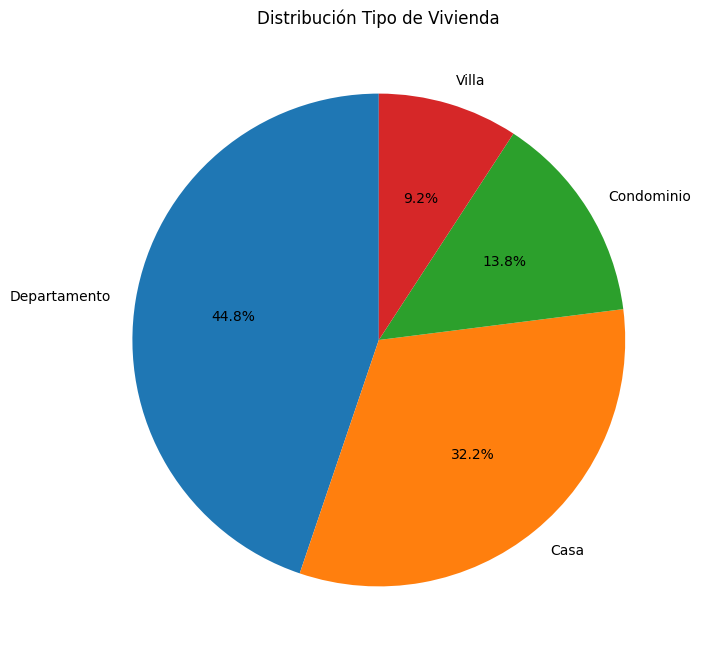


Interpretación del Gráfico Circular:
Muestra la proporción de cada tipo de vivienda. El tipo de vivienda más representado es 'Departamento', indicando la categoría dominante en el estudio.


In [6]:
print("\n--- 4.2 Gráfico Circular de Tipos de Vivienda ---")
# Calculamos el conteo de cada tipo de vivienda
conteo_tipos = df_consumo['tipo_vivienda'].value_counts()

# Creamos nuestro gráfico Circular (Pie Chart)
plt.figure(figsize=(8, 8))
# Función plt.pie llama a nuestra librería para crear el gráfico
plt.pie(conteo_tipos, labels=conteo_tipos.index, autopct='%1.1f%%', startangle=90)
# Título a mi grafico
plt.title("Distribución Tipo de Vivienda")
# Guardar gráfico
plt.savefig("plots/gráfico_circular_tipo_vivienda.png")
# Imprimir
plt.show()

# Interpretación
print("\nInterpretación del Gráfico Circular:")
print("Muestra la proporción de cada tipo de vivienda. El tipo de vivienda más representado es 'Departamento', indicando la categoría dominante en el estudio.")


--- 4.3 Diagrama de Pareto del Consumo ---


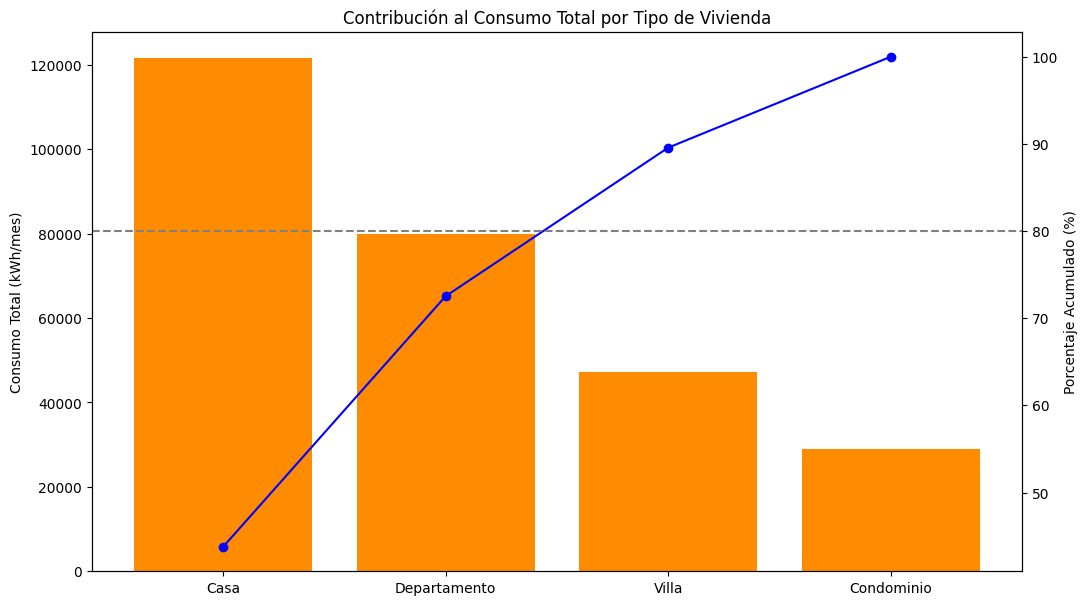


Interpretación del Diagrama de Pareto:
El Pareto muestra qué tipos de vivienda (los primeros en la barra, como Casa) concentran la mayor parte del consumo total, siguiendo el principio 80/20.


In [7]:
print("\n--- 4.3 Diagrama de Pareto del Consumo ---")

# Calcular el consumo total y ordenar
consumo_por_tipo = df_consumo.groupby('tipo_vivienda')['consumo_kwh_mes'].sum().sort_values(ascending=False)
porcentaje_acumulado = (consumo_por_tipo.cumsum() / consumo_por_tipo.sum()) * 100

# Creamos la figura y el primer eje (barras)
fig, ax1 = plt.subplots(figsize=(12, 7))

# Gráfico de barra (Consumo Total)
ax1.bar(consumo_por_tipo.index, consumo_por_tipo, color='darkorange')
ax1.set_ylabel("Consumo Total (kWh/mes)")

# Creamos el segundo eje para la línea
ax2 = ax1.twinx()

# Gráfico de línea (Porcentaje Acumulado) - Muestra la acumulación del 80/20
ax2.plot(consumo_por_tipo.index, porcentaje_acumulado, color='blue', marker='o')
ax2.set_ylabel("Porcentaje Acumulado (%)")
ax2.axhline(80, color='gray', linestyle='--')  # Línea de referencia del 80%

# Título al grafico
plt.title("Contribución al Consumo Total por Tipo de Vivienda")
# Guardar gráfico
plt.savefig("plots/diagrama_pareto_consumo_total_vivienda.png")
# Imprimir / muestra
plt.show()

# Interpretación
print("\nInterpretación del Diagrama de Pareto:")
print("El Pareto muestra qué tipos de vivienda (los primeros en la barra, como Casa) concentran la mayor parte del consumo total, siguiendo el principio 80/20.")